In [67]:
import tensorflow as tf
from edward.models import Poisson, Normal

In [106]:
nuispar = tf.constant([3.])
batch_size = 1000000
x = Poisson(rate = tf.ones((1,batch_size))*nuispar)
n = Normal(loc = tf.ones((1,batch_size))*nuispar, scale = tf.ones((1,batch_size)))
joined = tf.concat([x,n], axis=0)   # p(n, x | nuispar) = Pois(n|nuispar) * Normal(x |mu = nuispar, sigma = 1)

In [107]:
with tf.Session() as sess:
    r = sess.run(joined)
print(r.shape)

(2, 1000000)


Populating the interactive namespace from numpy and matplotlib


/Users/lukas/.local/share/virtualenvs/pyhf-EFAVEj2h/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


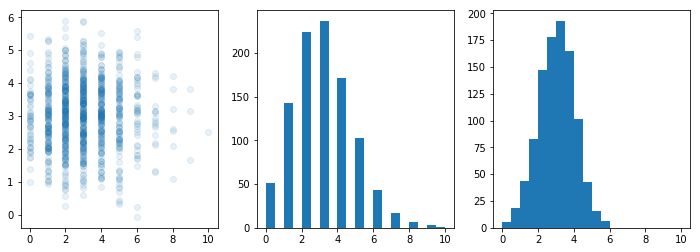

In [108]:
%pylab inline
r = np.array(results)
f, axarr = plt.subplots(1,3)
f.set_size_inches(12,4)
_=axarr[0].scatter(r[:,0],r[:,1], alpha=0.1)
_=axarr[1].hist(r[:,0], bins = np.linspace(0,10,21))
_=axarr[2].hist(r[:,1], bins = np.linspace(0,10,21))